In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import sys
import matplotlib
import matplotlib.pyplot as plt
from tifffile import imread
from glob import glob
import math
from itertools import chain
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from functools import partial
import matplotlib.animation as animation
import networkx as nx
from hmmlearn import hmm
import json


sys.path.append("/home/cstansbu/.local/lib/python3.9/site-packages/")
from skimage.color import rgb2gray
from skimage.transform import rescale
from skimage.exposure import rescale_intensity
from multiprocessing import Pool

In [18]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/pf-test-2/images/B2.prepared.tiff"

img = imread(fpath)
print(f"{img.shape=}")


img.shape=(3, 72, 1084, 1498)


   t  c        mean        std
0  0  0    6.681806  23.379254
1  0  1  147.735104  21.502818
2  0  2  173.342576  11.500605
3  1  0    6.927470  23.266886
4  1  1  152.319158  23.089357


<AxesSubplot: xlabel='t', ylabel='mean'>

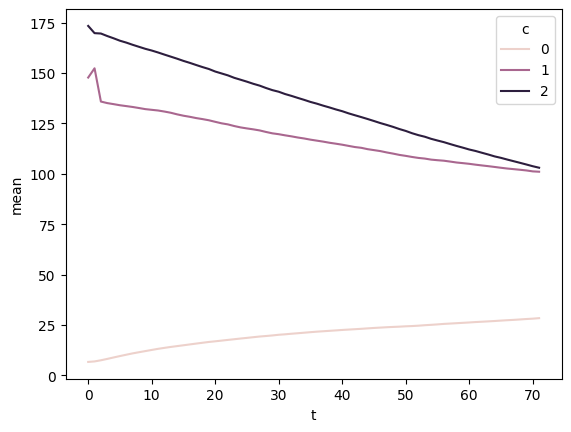

In [19]:
res = []

for t in range(img.shape[1]):
    for c in range(img.shape[0]):
        row = {
            't' : t,
            'c' : c,
            'mean' : np.mean(img[c, t, :, :]),
            'std' : np.std(img[c, t, :, :])
        }

        res.append(row)

res = pd.DataFrame(res)
print(res.head())

sns.lineplot(data=res, 
             x='t',
             y='mean',
             hue='c')

In [22]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/pf-test-2/background/B2.prepared.background.csv"

df = pd.read_csv(fpath)
df.tail()

,t,c,mean,std,size
3247,2,1079,137.484445,22.097860,78048
3248,2,1080,137.603014,22.222350,78048
3249,2,1081,137.613622,22.175001,78048
3250,2,1082,137.549444,22.121885,78048
3251,2,1083,137.491608,22.074103,78048


<AxesSubplot: xlabel='t', ylabel='mean'>

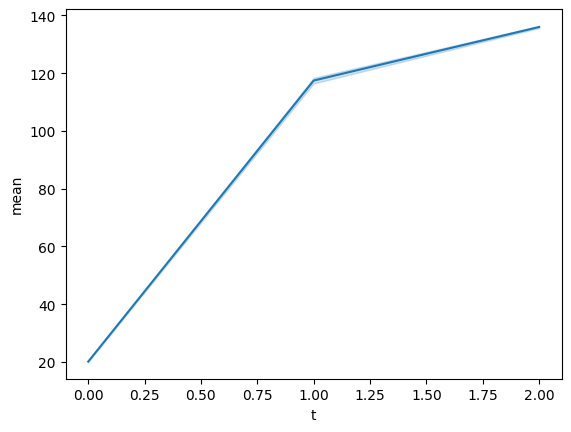

In [23]:
sns.lineplot(data=df, 
             x='t',
             y='mean')

   t  c        mean        std
0  0  0    7.174885  23.366886
1  0  1  148.235123  21.501439
2  0  2  173.839237  11.499707
3  1  0    7.423123  23.253843
4  1  1  152.819206  23.088110


<AxesSubplot: xlabel='t', ylabel='mean'>

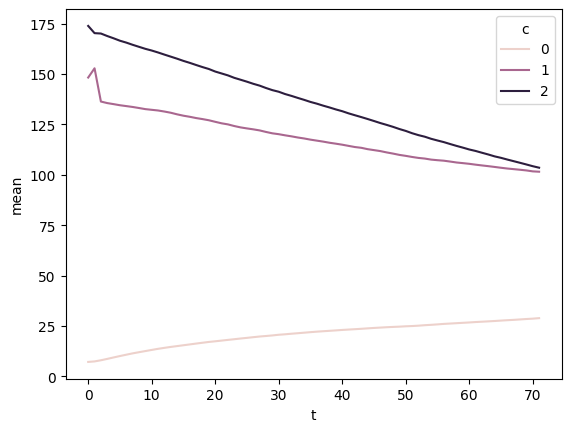

In [7]:
# sf = 0.5
# res = []

# for t in range(img.shape[1]):
#     for c in range(img.shape[0]):

#         img_t = rgb2gray(img[c, t, :, :, :])
#         img_t = rescale(img_t, 
#                         (sf, sf),
#                         anti_aliasing=False)

#         img_t = rescale_intensity(img_t, out_range=(0, 255))
        
#         row = {
#             't' : t,
#             'c' : c,
#             'mean' : np.mean(img_t),
#             'std' : np.std(img_t)
#         }

#         res.append(row)

# res = pd.DataFrame(res)
# print(res.head())

# sns.lineplot(data=res, 
#              x='t',
#              y='mean',
#              hue='c')

In [5]:
# t = 10
# c = 0

# plt.imshow(img[c, t, :, :, :])